In [51]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
import pandas as pd
import matplotlib as mpl

import glob
import pickle
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # window
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시

import seaborn as sns
from scipy.stats import hypergeom

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [52]:
def num_of_sig(sig_table):
    nsig_df=pd.DataFrame(columns=['num_of_sig','sig_genes'])
    
    for epval_th in [0.001, 0.005, 0.01]:
        xgb_sig=list(set(sig_table.loc[sig_table['epval']<epval_th].index))
        nsig_df.loc[epval_th]=[len(xgb_sig), xgb_sig]
    
    return nsig_df

def display_col_barplot(nsig_df, ax):
    
    nsig_sr=nsig_df['num_of_sig']
    
    ## plot bar
    nsig_sr.plot.bar(ax=ax, color='coral', width=0.9, rot=0, edgecolor='k')
    
    for x, val in enumerate(nsig_sr):
        _=ax.text(x, val, val, ha='center', va='bottom', fontsize=14)
        
    
    ## ticklabels & labels
    _=ax.tick_params(axis='both', labelsize=14)
    _=ax.set_xlabel('empirical p-value', fontsize=16)
    _=ax.set_ylabel('N. of significant genes', fontsize=16)
    _=ax.set_ylim(0,400)
    ## title
    _=ax.set_title('BRCA', fontsize=18)

,num_of_sig,sig_genes
0.001,54,"[BTBD8, PTGS2, SH3BGRL, GSTM5, TMPRSS5, KRT4, ..."
0.005,202,"[EGLN2, GRB7, ELAVL1, CLDN4, KCNJ3, CCDC93, WN..."
0.010,357,"[UNC93B1, PLGLB2, GRB7, WNT7A, TSKS, CCDC60, T..."


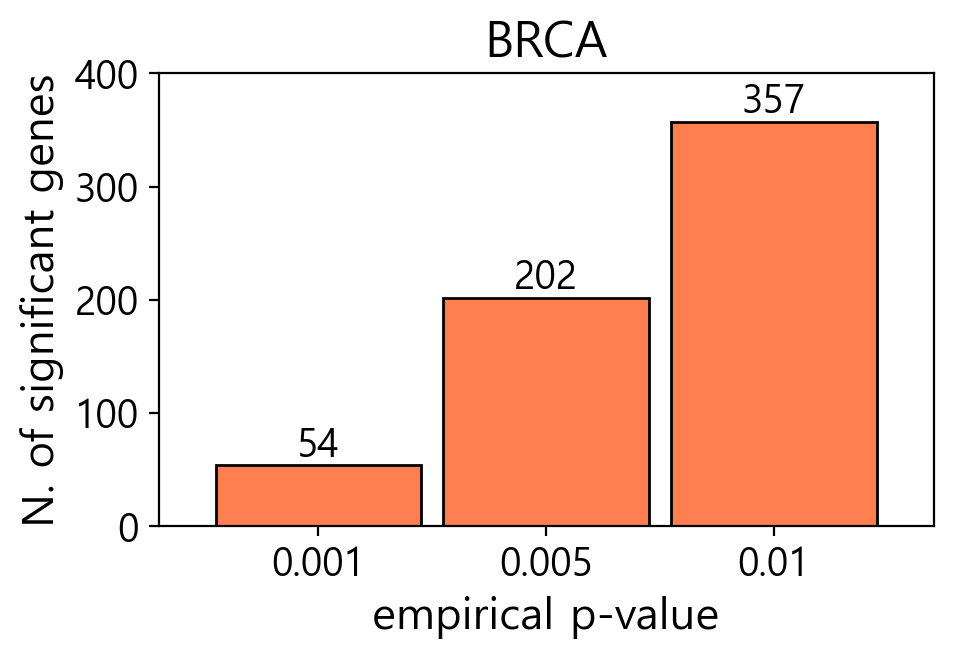

In [54]:
fig=plt.figure(figsize=(5,3), dpi=200)
ax=fig.subplots()

file_name = "D:/jmjung/n_stage_pred_BRCA/main_result/sig_res/BRCA.pickle"
sig_table = pickle.load(open(file_name, 'rb'))
nsig_df=num_of_sig(sig_table)
nsig_df
display_col_barplot(nsig_df, ax)
    
pickle.dump(nsig_df, open("D:/jmjung/n_stage_pred_BRCA/main_result/BRCA_sig_info.pickle", 'wb'))